# Problem 1:

Context

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of 
data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

In [1]:
#importing all libaries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from scipy.stats import zscore
import warnings
warnings.filterwarnings( "ignore")

## Loading the data

In [2]:
df = pd.read_excel('Election_Data.xlsx')
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [3]:
df.shape

(1525, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


### Removing the unwanted variable
- "Unnamed : 0",which is not giving a meaningful information. Anddisplaying the head of the dataset.

### Data preprocessing 

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [7]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1525, 9)
After (1517, 9)


In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [9]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [10]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [12]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


In [13]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [14]:
df[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


### unique values for categorical variables

In [15]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
vote
Conservative     460
Labour          1057
Name: count, dtype: int64


GENDER :  2
gender
male      709
female    808
Name: count, dtype: int64




## Univariate Analysis

<Axes: xlabel='age', ylabel='Count'>

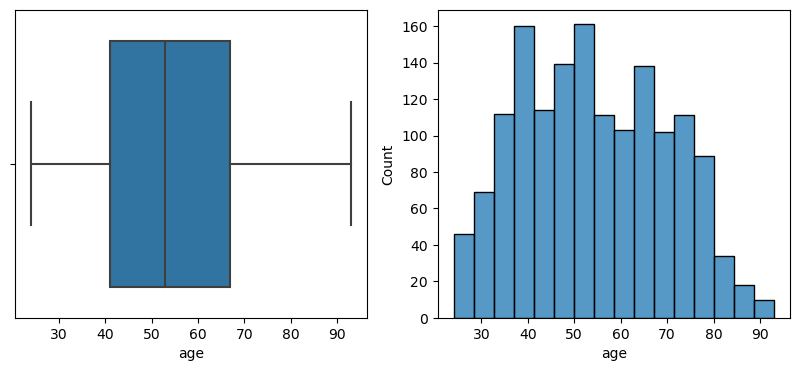

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='age', data=df)
plt.subplot(1, 2, 2)
sns.histplot(df['age'])

<Axes: xlabel='gender', ylabel='count'>

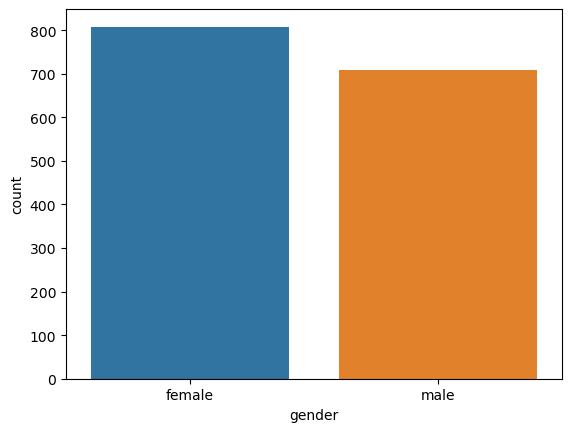

In [17]:
sns.countplot(df, x="gender")

<Axes: xlabel='vote', ylabel='count'>

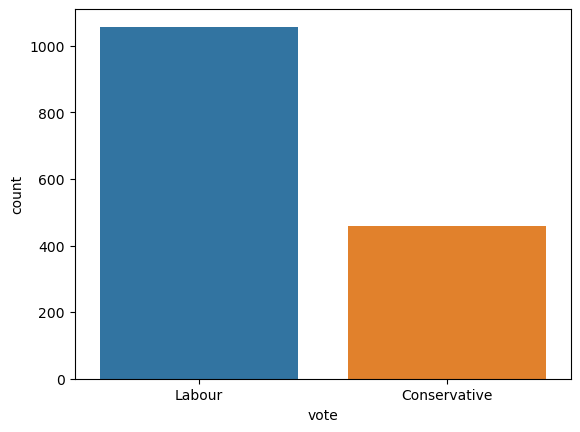

In [17]:
sns.countplot(df, x="vote")

<Axes: xlabel='economic.cond.national', ylabel='count'>

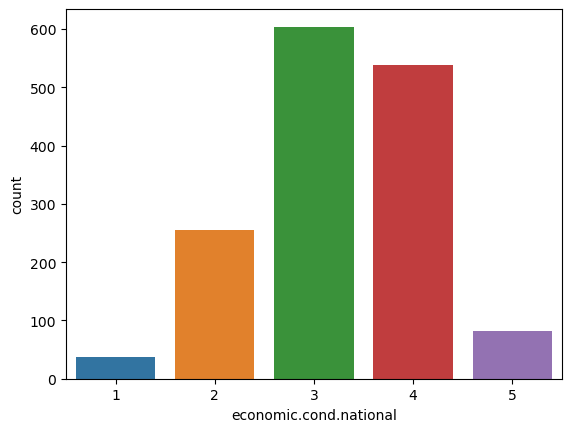

In [18]:
sns.countplot(df,x="economic.cond.national")

<Axes: xlabel='economic.cond.household', ylabel='count'>

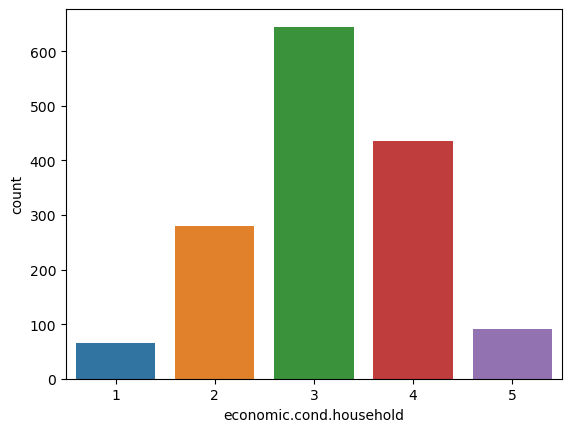

In [19]:
sns.countplot(data=df,x='economic.cond.household')

<Axes: xlabel='Blair', ylabel='count'>

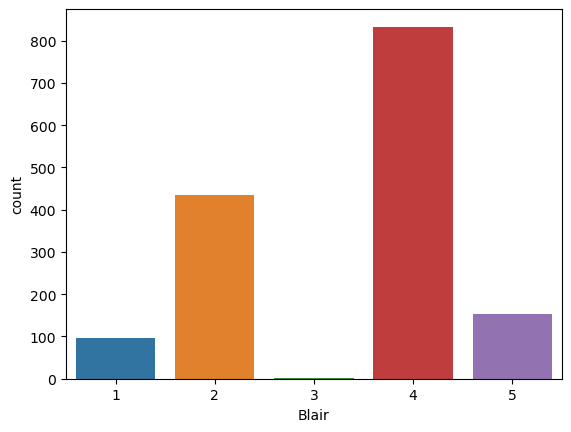

In [20]:
sns.countplot(data=df,x='Blair')

<Axes: xlabel='Hague', ylabel='count'>

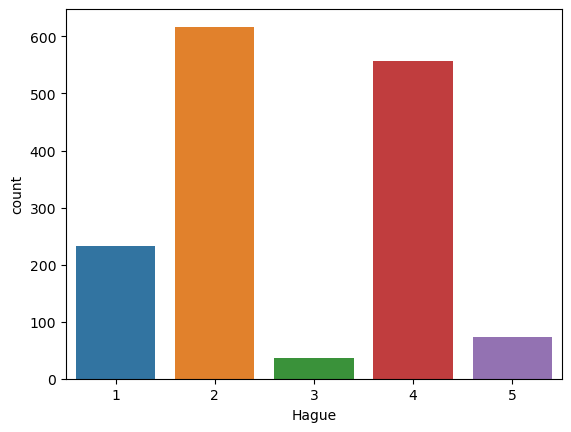

In [21]:
sns.countplot(data=df,x='Hague')

<Axes: xlabel='Europe', ylabel='count'>

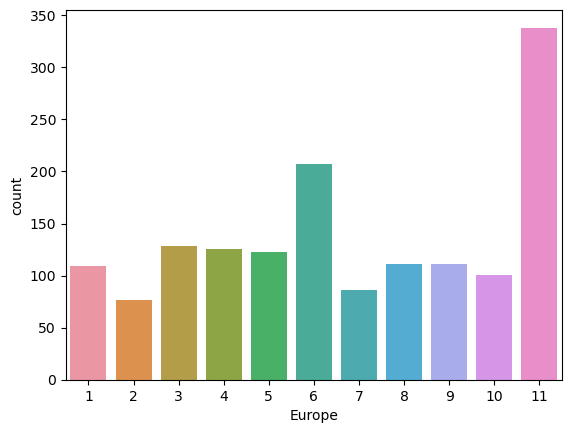

In [22]:
sns.countplot(data=df,x='Europe')

<Axes: xlabel='political.knowledge', ylabel='count'>

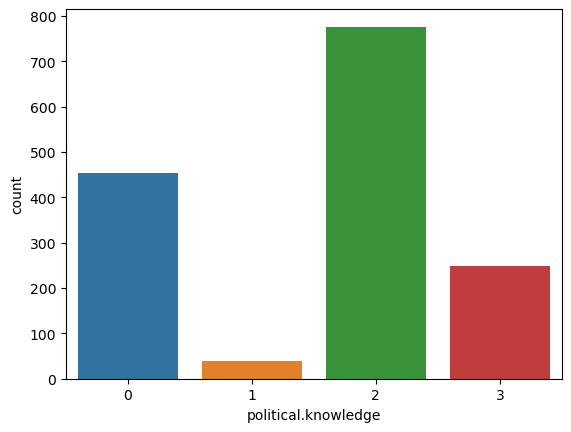

In [23]:
sns.countplot(data=df,x='political.knowledge')

## Multivariate analysis

<Axes: xlabel='economic.cond.national', ylabel='count'>

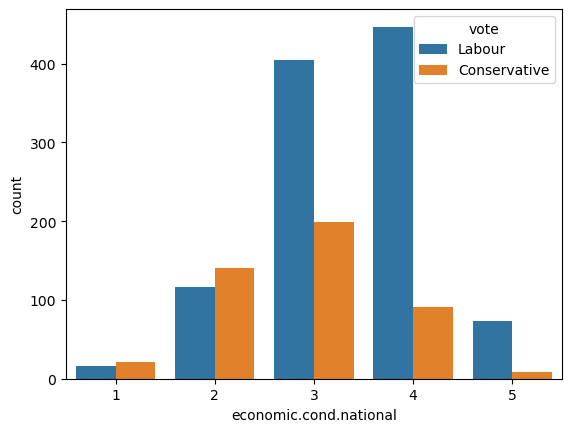

In [24]:
sns.countplot(data=df,x='economic.cond.national',hue='vote')

<Axes: xlabel='economic.cond.household', ylabel='count'>

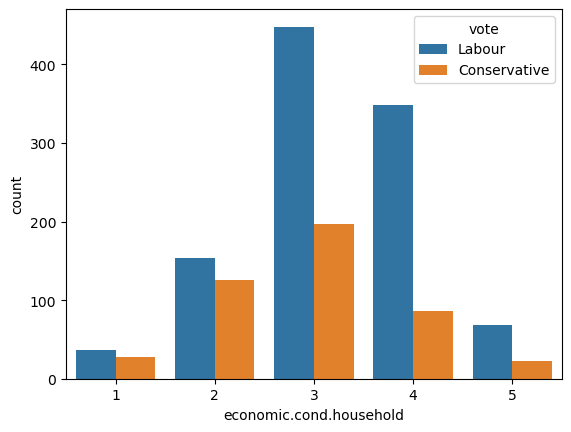

In [25]:
sns.countplot(data=df,x='economic.cond.household',hue='vote')

<Axes: xlabel='Blair', ylabel='count'>

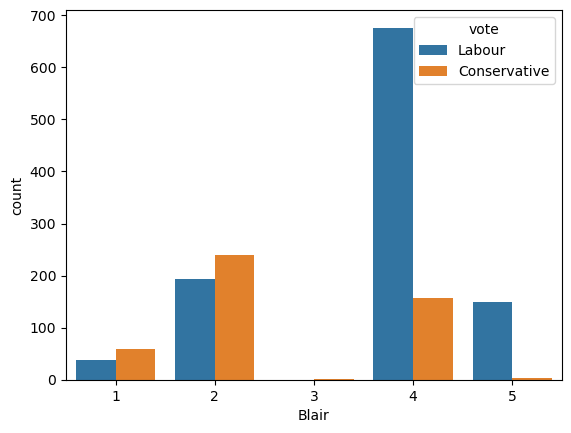

In [26]:
sns.countplot(data=df,x='Blair',hue='vote')

<Axes: xlabel='Hague', ylabel='count'>

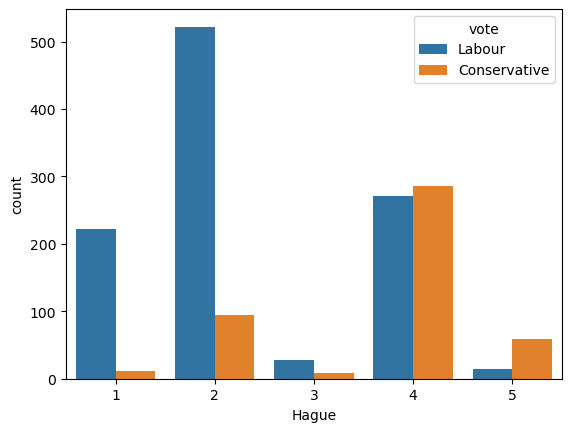

In [27]:
sns.countplot(data=df,x='Hague',hue='vote')

<Axes: xlabel='Europe', ylabel='count'>

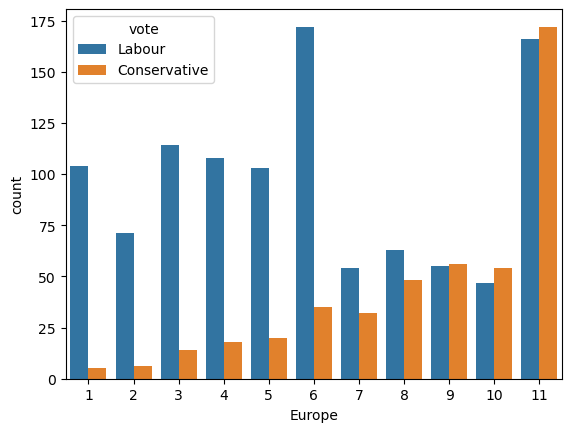

In [28]:
sns.countplot(data=df,x='Europe',hue='vote')

<Axes: xlabel='gender', ylabel='count'>

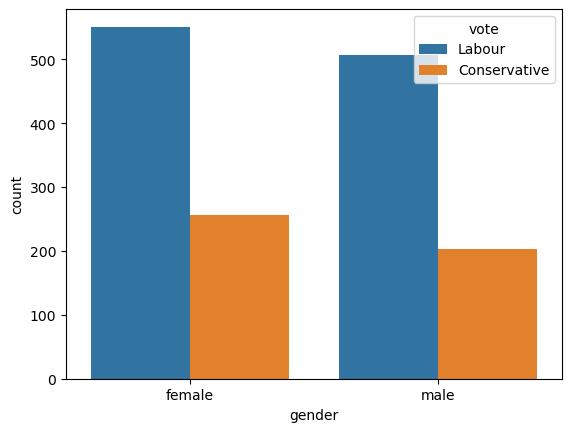

In [29]:
sns.countplot(data=df,x='gender',hue='vote')

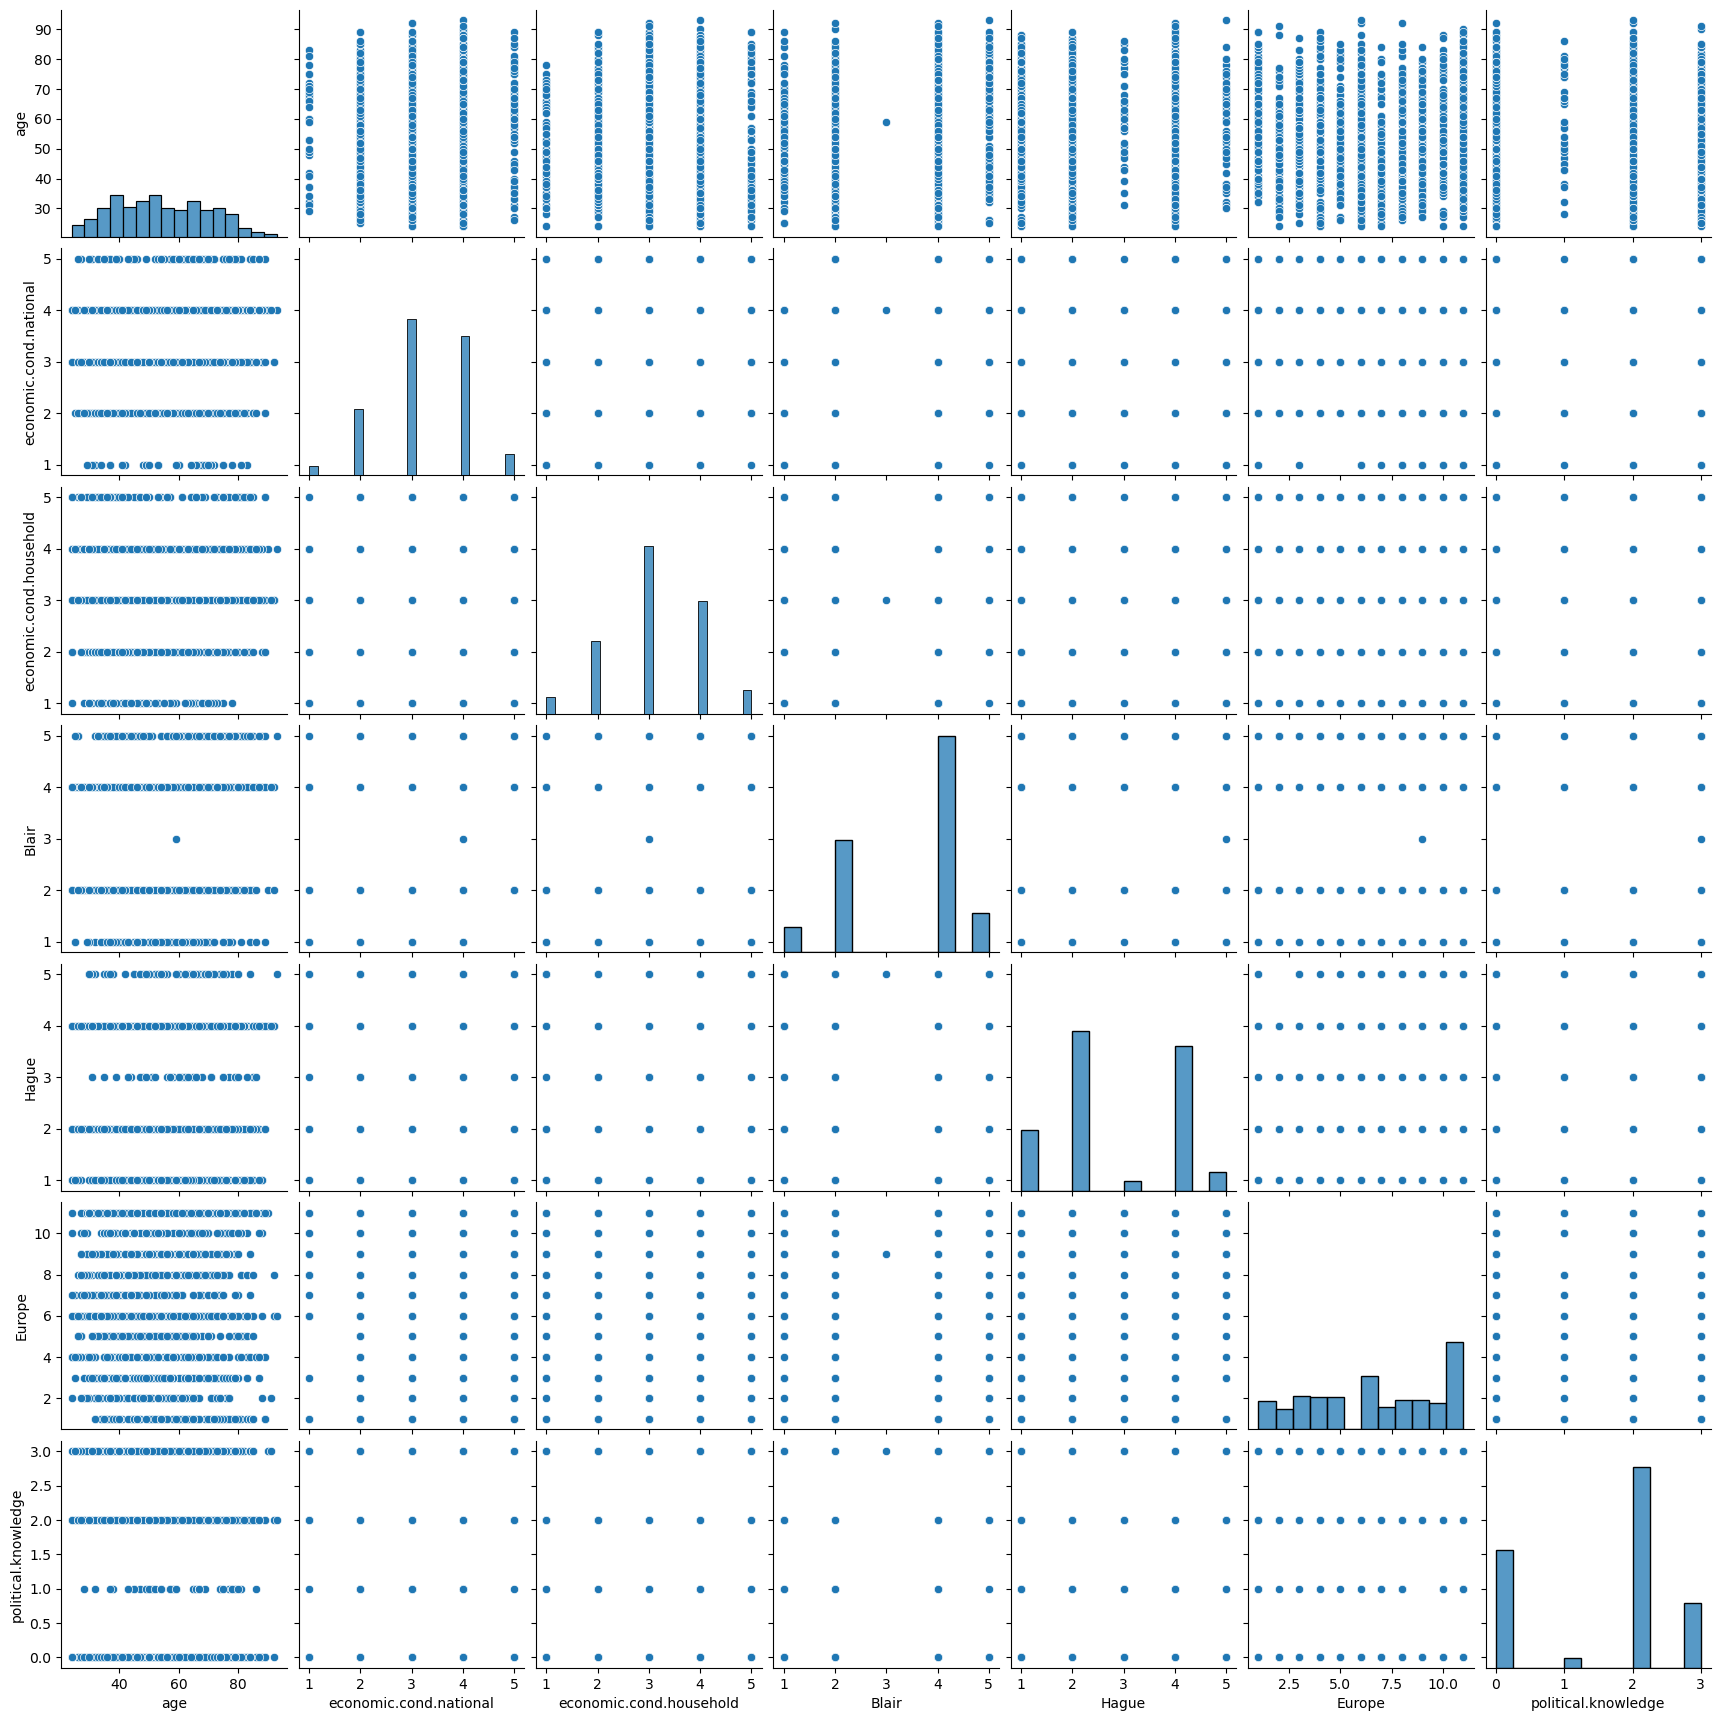

In [30]:
sns.pairplot(df)

<Axes: >

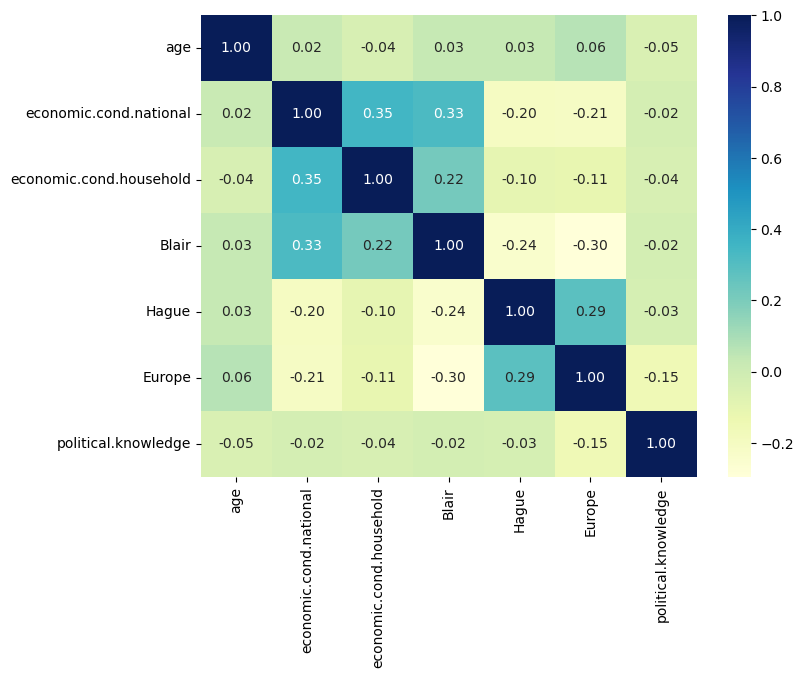

In [31]:
df_cor=df[num].corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt='.2f', cmap='YlGnBu')

<Axes: >

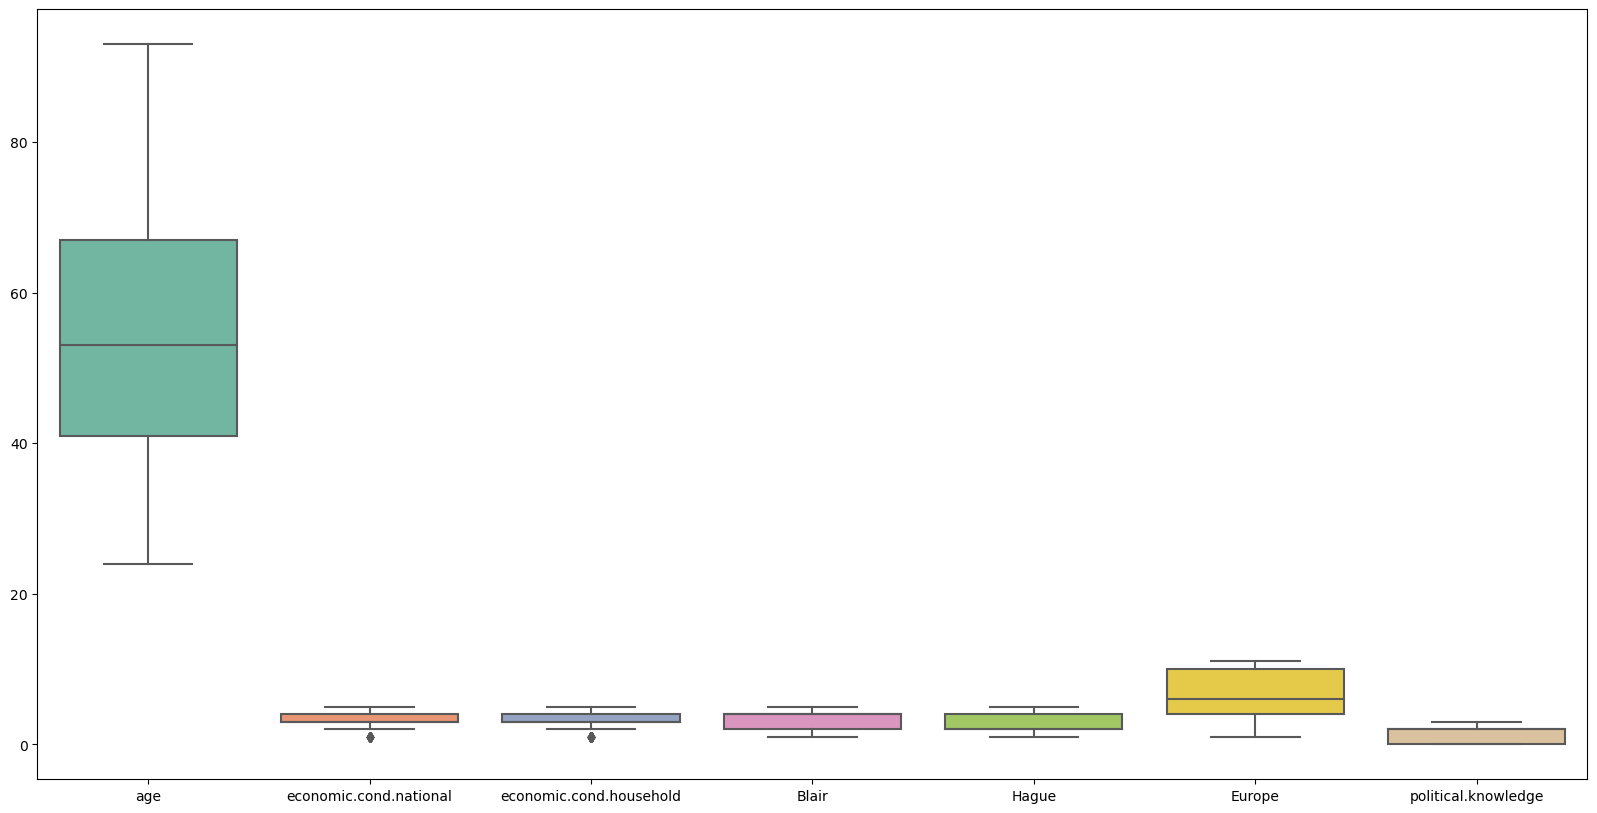

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="v", palette="Set2")

## outlier treatment

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

In [35]:
lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

<Axes: >

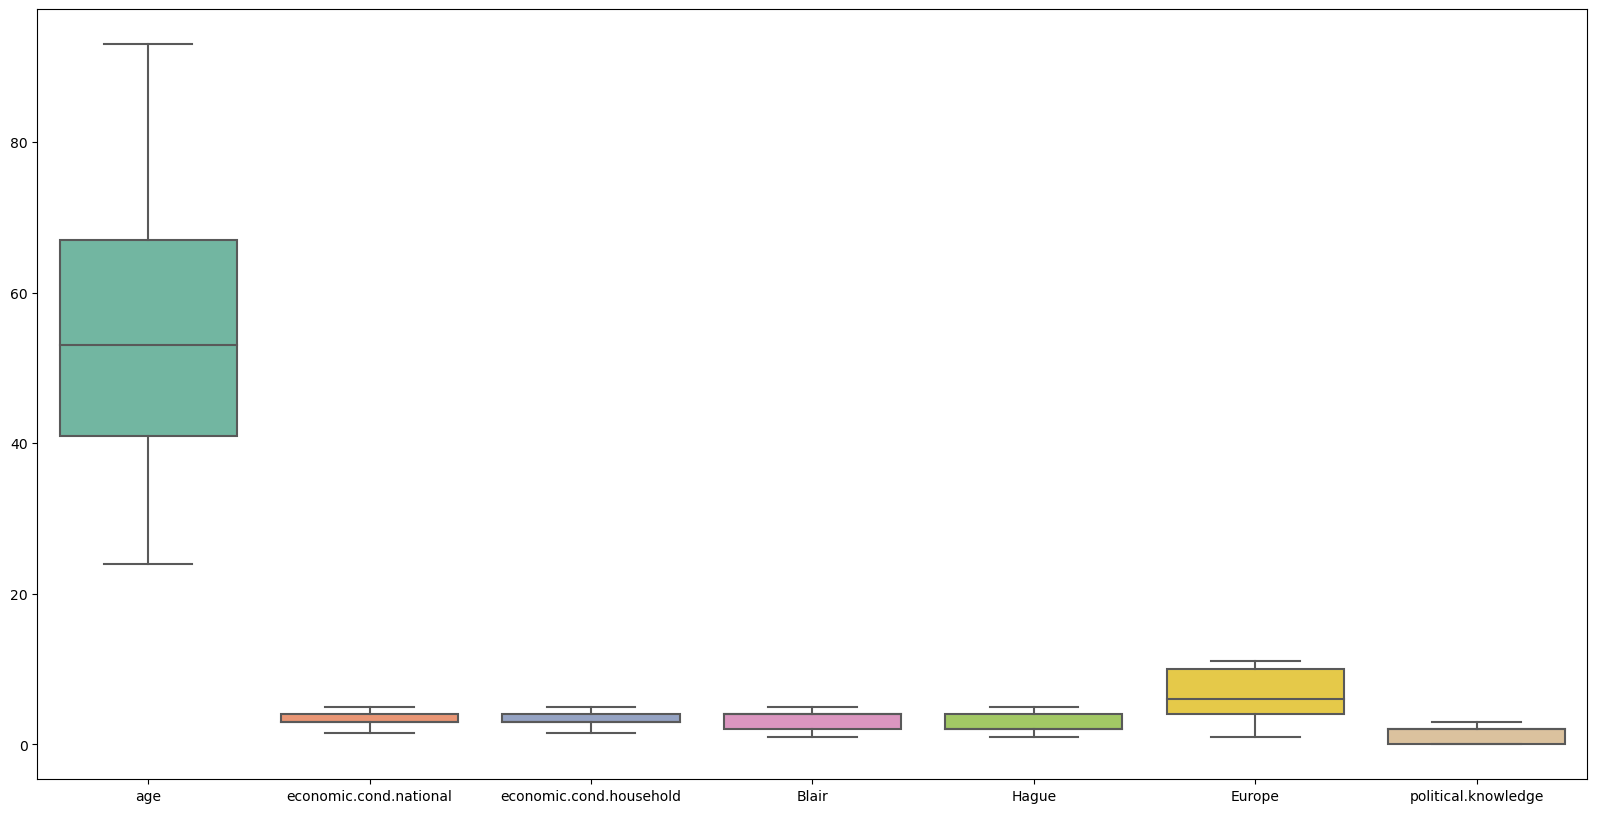

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="v", palette="Set2")

### Converting Categorical to numerical

In [37]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [38]:
df = df.replace(replace)

In [39]:
df["gender"].value_counts()

gender
0    808
1    709
Name: count, dtype: int64

In [40]:
df["vote"].value_counts()

vote
0    1057
1     460
Name: count, dtype: int64

In [41]:
df.shape

(1517, 9)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   int64  
 1   age                      1517 non-null   int64  
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   int64  
 5   Hague                    1517 non-null   int64  
 6   Europe                   1517 non-null   int64  
 7   political.knowledge      1517 non-null   int64  
 8   gender                   1517 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 118.5 KB


## Train-Test Split

In [43]:
X = df.drop(['vote'],axis=1)
y = df['vote']

In [44]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state = 1)

## Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Model = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)
Model.fit(X_train,y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [46]:
y_train_predict=Model.predict(X_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[688  66]
 [110 197]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.75      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



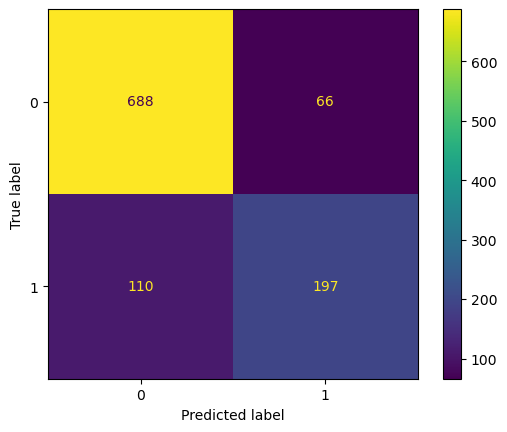

In [48]:
cm = confusion_matrix(y_train, y_train_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()

AUC: 0.890


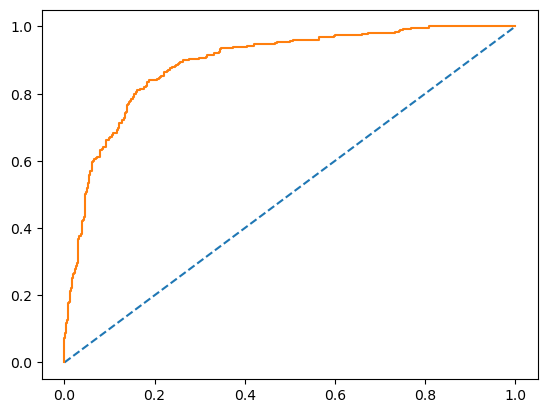

In [49]:
probs = Model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [51]:
y_test_predict=Model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[267  36]
 [ 42 111]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



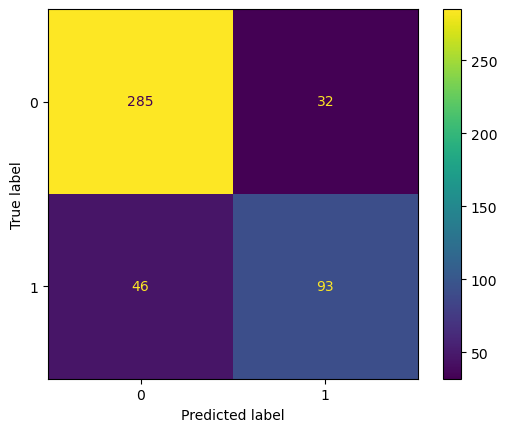

In [104]:
cm = confusion_matrix(y_test, y_test_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()

AUC: 0.890


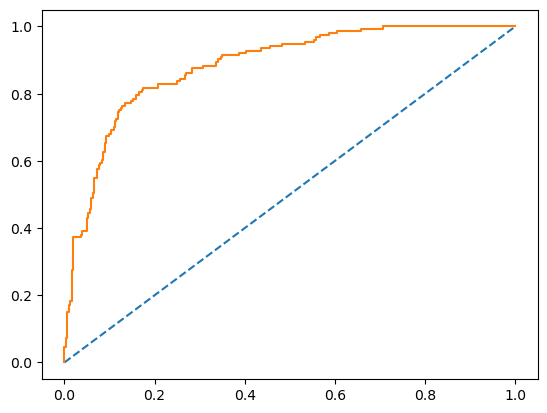

In [52]:
# predict probabilities
probs = Model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Linear Discriminant Analysis

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train,y_train)

In [54]:
print(confusion_matrix(lda.predict(X_train),y_train))
print(classification_report(lda.predict(X_train),y_train))

[[685 107]
 [ 69 200]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       792
           1       0.65      0.74      0.69       269

    accuracy                           0.83      1061
   macro avg       0.78      0.80      0.79      1061
weighted avg       0.84      0.83      0.84      1061



In [55]:
print(confusion_matrix(lda.predict(X_test),y_test))
print(classification_report(lda.predict(X_test),y_test))

[[268  42]
 [ 35 111]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       310
           1       0.73      0.76      0.74       146

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.890


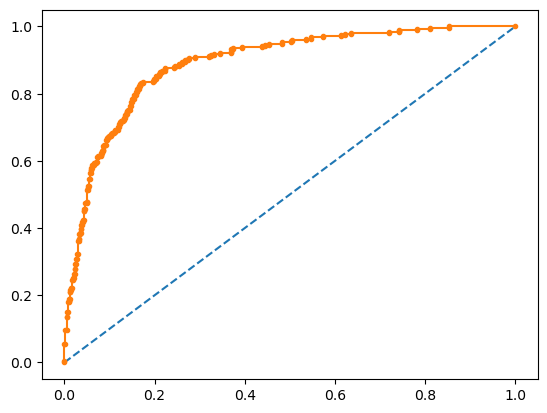

In [56]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.888


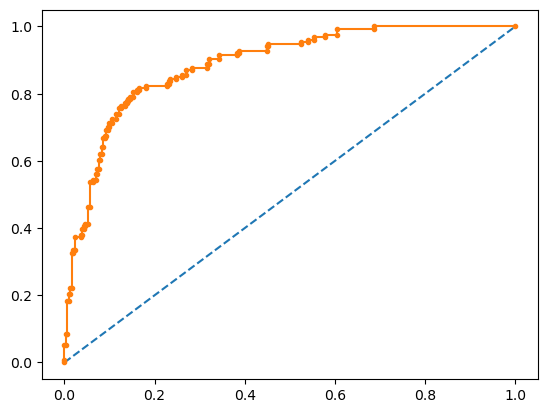

In [57]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Naive Bayes Model

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [59]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [60]:
        print(confusion_matrix(NB_model.predict(X_train),y_train))
print(classification_report(NB_model.predict(X_train),y_train))

[[673  95]
 [ 81 212]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       768
           1       0.69      0.72      0.71       293

    accuracy                           0.83      1061
   macro avg       0.79      0.80      0.80      1061
weighted avg       0.84      0.83      0.84      1061



In [61]:
print(confusion_matrix(NB_model.predict(X_test),y_test))
print(classification_report(NB_model.predict(X_test),y_test))

[[263  41]
 [ 40 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       304
           1       0.73      0.74      0.73       152

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.889


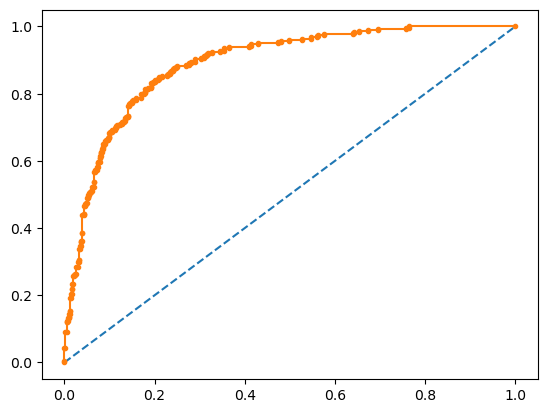

In [62]:
# AUC and ROC for the training data

# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.876


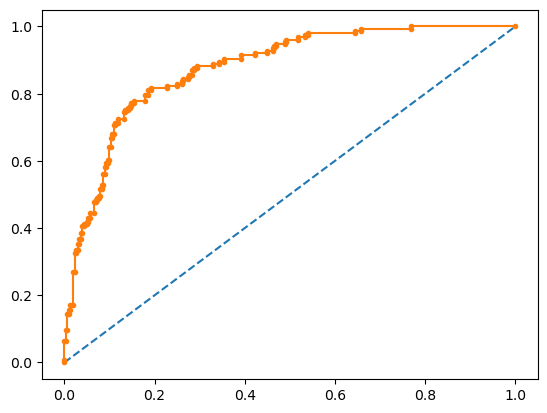

In [63]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## KNeighborsClassifier Model

In [64]:
X = df.drop(['vote'],axis=1)
y = df['vote']

In [65]:
X[['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender']]=X[['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender']].apply(zscore)

In [66]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8708765315739868
[[686  54]
 [ 83 238]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       740
           1       0.82      0.74      0.78       321

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



AUC: 0.936


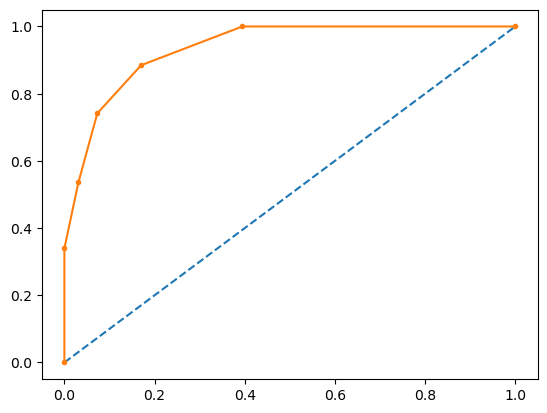

In [69]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

In [70]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[281  36]
 [ 45  94]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       317
           1       0.72      0.68      0.70       139

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.839


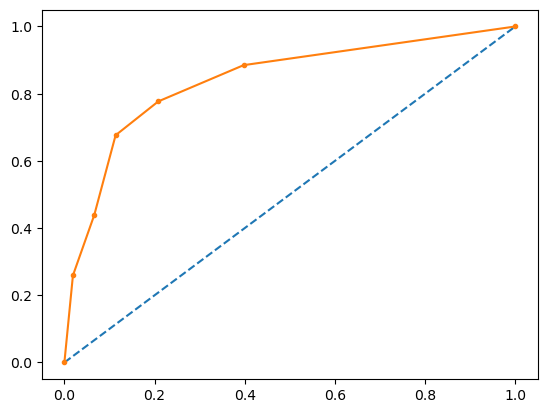

In [71]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## BaggingClassifier

In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [73]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[740   0]
 [  0 321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       321

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


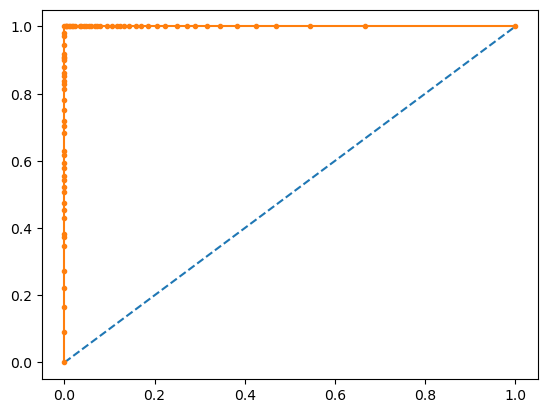

In [74]:
# AUC and ROC for the training data

# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [75]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7916666666666666
[[278  39]
 [ 56  83]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       317
           1       0.68      0.60      0.64       139

    accuracy                           0.79       456
   macro avg       0.76      0.74      0.75       456
weighted avg       0.79      0.79      0.79       456



AUC: 0.844


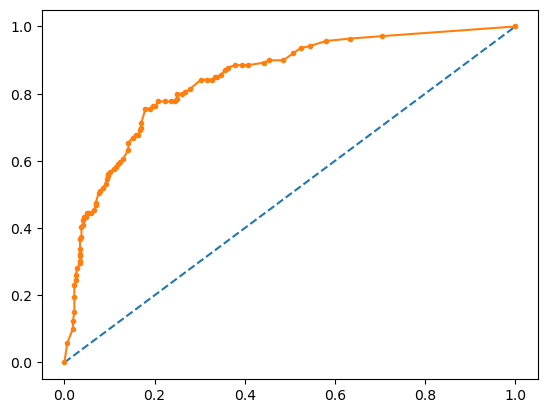

In [76]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [78]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8953817153628653
[[696  44]
 [ 67 254]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       740
           1       0.85      0.79      0.82       321

    accuracy                           0.90      1061
   macro avg       0.88      0.87      0.87      1061
weighted avg       0.89      0.90      0.89      1061



AUC: 0.957


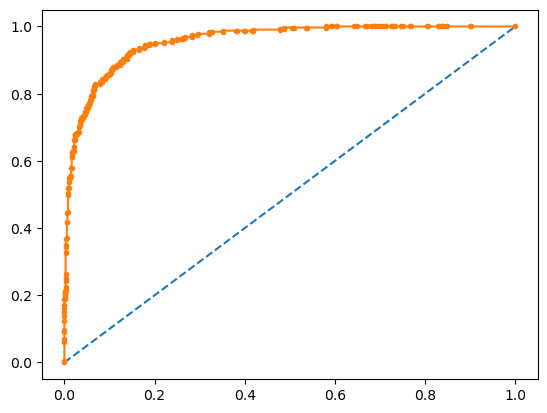

In [79]:
# AUC and ROC for the training data

# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [80]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[285  32]
 [ 46  93]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       317
           1       0.74      0.67      0.70       139

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.884


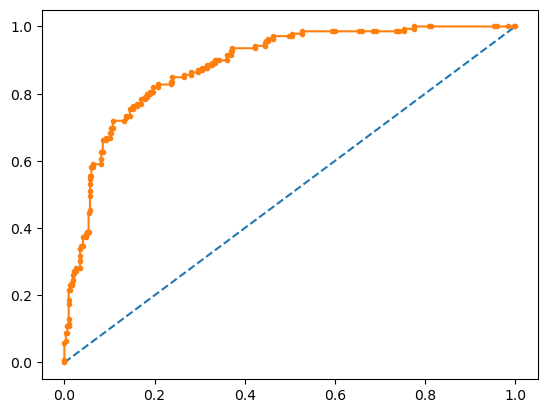

In [81]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Comparison of  Models

Let's look at the performance of all the models on the Train Data set

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

Naive Bayes - Recall for class "1" is .72

               precision    recall  f1-score   support
           0       0.89      0.88      0.88       768
           1       0.69      0.72      0.71       293

    accuracy                           0.83      1061
   macro avg       0.79      0.80      0.80      1061
weighted avg       0.84      0.83      0.84      1061


KNN  - Recall for class "1" is .74

               precision    recall  f1-score   support
           0       0.89      0.93      0.91       740
           1       0.82      0.74      0.78       321

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061


Bagging  - Recall for class "1" is  1(100%)

               precision    recall  f1-score   support
           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       321

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 
 
Gradient Boosting - Recall for class "1" is .79

               precision    recall  f1-score   support
           0       0.91      0.94      0.93       740
           1       0.85      0.79      0.82       321

    accuracy                           0.90      1061
   macro avg       0.88      0.87      0.87      1061
weighted avg       0.89      0.90      0.89      1061

so as per the train data,
- low performing models are **Naive bayes
- best performing models are - **Boosting and bagging


#### Recall on the Test Data Set

Naive Bayes - Recall for class "1" is .74

                precision    recall  f1-score   support
           0       0.87      0.87      0.87       304
           1       0.73      0.74      0.73       152

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456


KNN  - Recall for class "1" is .68

                 precision    recall  f1-score   support
           0       0.86      0.89      0.87       317
           1       0.72      0.68      0.70       139

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456


Bagging - Recall for class "1" is .60

                  precision    recall  f1-score   support
           0       0.83      0.88      0.85       317
           1       0.68      0.60      0.64       139

    accuracy                           0.79       456
   macro avg       0.76      0.74      0.75       456
weighted avg       0.79      0.79      0.79       456


Gradient Boosting - Recall for class "1" is .67

                precision    recall  f1-score   support
           0       0.86      0.90      0.88       317
           1       0.74      0.67      0.70       139

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456

so as per the test data,
- low performing models are **bagging
- best performing models are - **Naive bayes

## Based on these predictions, what are the insights

- Based on the predictions from the given data, we can say that Labour party will be winning the upcoming elections with more no of seats compared to Conservative party.


- If we look at the model, we can see Labour party has high number of rating in terms of economic house conditions and national economic conditions. If the opposition party i.e., Conservative party can offer much better economic conditions and make the people believe in their abilities, they can increase theno of votes, and gain much more seats.

- Also, from the model, we can see that each voters are having very less knowledge of politics. Therefore campaings should be conducted so that the people know more about the political party they are choosing.

- After the elections, political leaders should make sure that they stand by their words, so that duringthe next elections too they can win without much competition.

- People should have a choice to choose their own leaders. If we look at the rating given for the leaders,we can see conservative party is having very less rating. Therefore the party should make it a point toeither change the leader or to bring in more changes in the party.

# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1.President Franklin D. Roosevelt in 1941

2.President John F. Kennedy in 1961

3.President Richard Nixon in 1973

In [82]:
import re 
import nltk
import string
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Error loading inaugural: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## Number of Characters in each file

In [83]:
number_of_character =len(Roosevelt)
print('number of character in Rossevelt file :',number_of_character)

number_of_character=len(Kennedy)
print('number of character in Kennedy file :',number_of_character)

number_of_character=len(Nixon)
print('number of character in Nixon file :',number_of_character)

number of character in Rossevelt file : 7571
number of character in Kennedy file : 7618
number of character in Nixon file : 9991


## Number of words in each text file

In [84]:
#Number of words in Rossevelt
x = (Roosevelt)
words= x.split()
print('Number of words in Roosevelt:',len(words))

Number of words in Roosevelt: 1360


In [85]:
#Number of words in Kennedy
x = (Kennedy)
words= x.split()
print('Number of words in Kennedy:',len(words))

Number of words in Kennedy: 1390


In [86]:
#Number of words in Nixon
x = (Nixon)
words= x.split()
print('Number of words in Nixon:',len(words))

Number of words in Nixon: 1819


## Number of Sentences.

In [87]:
#number of sentences in Roosevelt
y =pd.DataFrame({"Text":inaugural.raw('1941-Roosevelt.txt')},index =[0])
y['séntences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,séntences
0,On each national day of inauguration since 178...,67


In [88]:
#number of sentences in kennedy
y =pd.DataFrame({"Text":inaugural.raw('1961-Kennedy.txt')},index =[0])
y['séntences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,séntences
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [89]:
#number of sentences in Nixon
y =pd.DataFrame({"Text":inaugural.raw('1973-Nixon.txt')},index =[0])
y['séntences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,séntences
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


## Text cleaning

### Removal of StopWords

In [90]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

Roosevelt_word_tokens = word_tokenize(Roosevelt)
Roosevelt_filtered_list = [word for word in Roosevelt_word_tokens if word.lower() not in stop_words]        
print(Roosevelt_word_tokens)
print(Roosevelt_filtered_list)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

In [91]:
Kennedy_word_tokens = word_tokenize(Kennedy)
Kennedy_filtered_list = [word for word in Kennedy_word_tokens if word.lower() not in stop_words]        
print(Kennedy_word_tokens)
print(Kennedy_filtered_list)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [92]:
Nixon_word_tokens = word_tokenize(Nixon)
Nixon_filtered_list = [word for word in Nixon_word_tokens if word.lower() not in stop_words]        
print(Nixon_word_tokens)
print(Nixon_filtered_list)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [93]:
# Stemming of words in Rossevelt
from nltk.stem import PorterStemmer
rossevelt_step = PorterStemmer()
print(rossevelt_step.stem(Roosevelt))

on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states.

in washington's day the task of the people was to create and weld together a nation.

in lincoln's day the task of the people was to preserve that nation from disruption from within.

in this day the task of the people is to save that nation and its institutions from disruption from without.

to us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction.

lives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live.

there are men who doubt this. there are men who believe that democracy, as a form 

In [94]:
# Stemming of words in Kennedy
Kennedy_step = PorterStemmer()
print(Kennedy_step.stem(Kennedy))

vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

the world is very different now. for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of god.

we dare not forget today that we are the heirs of that first revolution. let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [95]:
# Stemming of words in Nixon
Nixon_step = PorterStemmer()
print(Nixon_step.stem(Nixon))

mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, and my fellow citizens of this great and good country we share together:

when we met here four years ago, america was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

as we meet here today, we stand on the threshold of a new era of peace in the world.

the central question before us is: how shall we use that peace? let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of america as we enter our third century as a nation.

this past year saw far-reaching results from our new policies for peace. by continuing to revitalize our traditional friendship

## Most common words in each text file

In [96]:
from collections import Counter
from nltk. tokenize import RegexpTokenizer 
# top three most common words in Roosevelt
tokenizer = RegexpTokenizer (r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
roosevelt_word_count = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
roosevelt_common_words = roosevelt_word_count.most_common()
roosevelt_top_words = [x for x in roosevelt_common_words[0:3]]
print(roosevelt_top_words)

[('Nation', 12), ('Spirit', 9), ('Life', 9)]


In [97]:
# top three most common words in Kennedy
tokenizer = RegexpTokenizer (r'\w+')
Kennedy_no_punc = tokenizer.tokenize(Kennedy)
set(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
kennedy_word_count = Counter(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
kennedy_common_words = kennedy_word_count.most_common()
kennedy_top_words = [x for x in kennedy_common_words[0:3]]
print(kennedy_top_words)

[('World', 8), ('Sides', 8), ('Pledge', 7)]


In [98]:
# top three most common words in Nixon
tokenizer = RegexpTokenizer (r'\w+')
Nixon_no_punc = tokenizer.tokenize(Nixon)
set(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
Nixon_word_count = Counter(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
Nixon_common_words = Nixon_word_count.most_common()
Nixon_top_words = [x for x in Nixon_common_words[0:3]]
print(Nixon_top_words) 

[('America', 21), ('Peace', 19), ('World', 18)]


## Creating a Wordcloud

In [99]:
from wordcloud import WordCloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                stopwords = None, 
                min_font_size = 10).generate(text)
    
    # Display the generated word cloud
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.xlabel('Word Cloud')
    plt.tight_layout(pad = 0) 
  
    plt.show() 

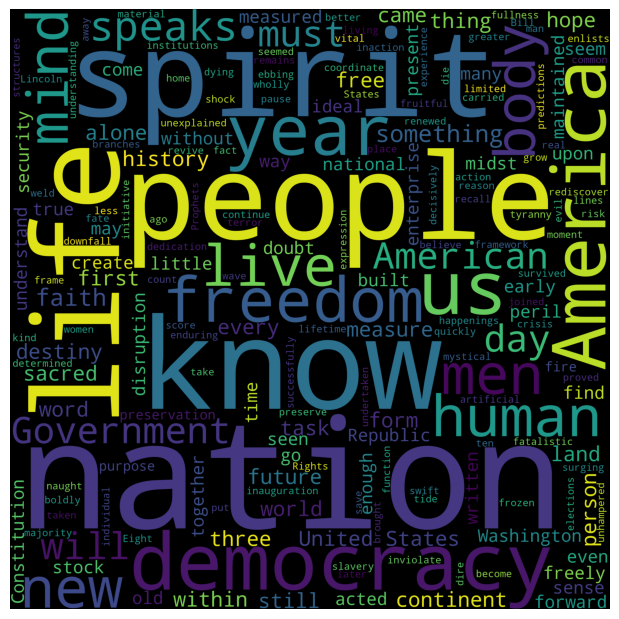

In [100]:
# Wordcloud for Roosevelt
generate_wordcloud(Roosevelt)

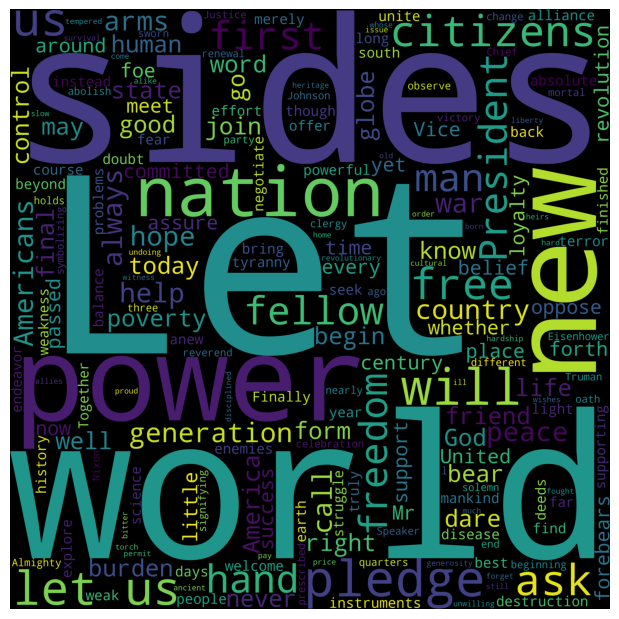

In [101]:
# Wordcloud for Kennedy
generate_wordcloud(Kennedy)

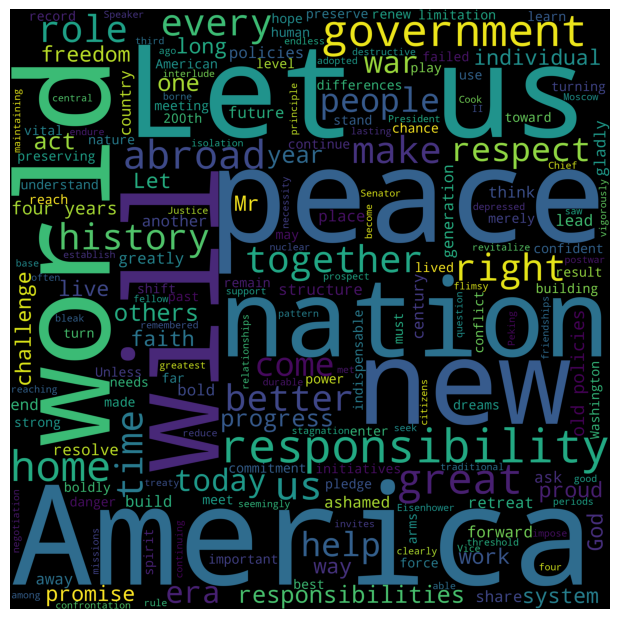

In [102]:
# Wordcloud for Nixon
generate_wordcloud(Nixon)